# A2: Regression Model Development (Individual) </h2>

## Introduction

The following regression model and analysis is based on the Course Case : **Apprentice Chef, Inc.** <br>
The company provides innovative solutions to busy professionals by delivering meal sets daily that take 30 minutes or less to prepare, including disposable cookware.

## Models Tested

For the purpose of this assignment, the models listed below were utilized and evaluated:

- _statsmodels_
    - OLS Regression
    
- _scikit-learn_
    - Linear Regression
    - Lasso Regression
    - Ridge Regression
    - ARD Regression
    - CART Models: Decision Trees (Unpruned & Pruned)
    - Random Forest (Unpruned & Pruned)
    - Gradient Boosting Machines (Unpruned & Pruned)
    

## Assumptions

1. As per the data dictionary, the feature "LARGEST_ORDER_SIZE" actually represents the AVERAGE number of meals    ordered per customer. Hence, it is considered as a continuous variable.

2. The feature in the dataset labeled as "AVG_MEAN_RATING" is being assumed to be misspelled and denote average __meal__ rating instead. Also, considering the meal rating is in a shorter range of 1-5, we will treat it as an interval data type.

3. For OLS regression, the data classified as interval or count has also been considered for the evaluation of the model (p-value) since the variables seem to be mostly continuous. 


## APA References

1. McKinney. (2012, July 5). Renaming column names in Pandas. Stack Overflow. Retrieved February 19, 2023, from https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas

2. Rochael. (2013, February 7). How to split a dataframe string column into two columns? Stack Overflow. Retrieved February 19, 2023, from https://stackoverflow.com/questions/14745022/how-to-split-a-dataframe-string-column-into-two-columns

3. w3schools. (n.d.). Python String split() Method. Python String Split() Method. Retrieved February 19, 2023, from https://www.w3schools.com/python/ref_string_split.asp
 
 

---

## Part I : Exploratory Data Analysis 

**1) Importing required modules and instantiating the dataset in Python:** 

In [1]:
# importing all the necessary libraries
import pandas as pd                  # data science essentials
import matplotlib.pyplot as plt      # essential graphical output
import seaborn as sns                # enhanced graphical output


# setting output display options for pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# creating a variable to specify the file name
# Since the dataset exists in the same location as this notebook, we are not giving the full path for the location
file = 'Apprentice_Chef_Dataset_2023.xlsx'      


# Using pd.read_excel to read the file into Python
chef = pd.read_excel(io = file , sheet_name = 0, header = 0)


# outputting the first ten rows of the dataset
chef.head(n = 10)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174
5,2917.5,Rollam Westerling,rollam.westerling@jnj.com,Rollam,Westerling,246,7,1,2,240.3,1,5,1,20,0,240.90,8,4.473684,16
6,3901.5,Utt,utt@passport.com,Utt,Utt,316,10,1,5,183.8,2,5,2,46,4,140.01,6,3.157895,584
7,5000.0,Bandy,bandy@aol.com,Bandy,Bandy,251,10,1,1,269.6,4,5,2,40,0,143.00,8,2.894737,1095
8,3090.0,Rickard Karstark,rickard.karstark@live.com,Rickard,Karstark,256,7,1,5,218.4,2,6,1,30,0,120.34,6,2.894737,198
9,5745.0,Androw Frey,androw.frey@protonmail.com,Androw,Frey,297,8,1,6,266.8,1,6,1,32,0,140.88,8,2.894737,664


On further analysis, it was observed that the column "LATE_DELIVERIES" contained a trailing space in the original dataset, which was breaking the code in later stages. Hence, to avoid this, the column has been renamed using the df.rename function from Pandas.

In [2]:
# Renaming column "LATE_DELIVERIES " to "LATE_DELIVERIES"  (McKinney, 2012)
chef.rename(columns={'LATE_DELIVERIES ': 'LATE_DELIVERIES'}, inplace=True)

<br>

**2) Printing basic information and descriptive statistics on the dataset:**

In [3]:
# printing the information (datatypes and non-missing values) about the chef dataframe
chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

In [4]:
# printing the number of rows(observations) and columns(features) in the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {chef.shape[0]}
Features:     {chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     19



In [5]:
# printing descriptive statistics
chef.describe().round(decimals = 2)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


<br>

**3) Analyzing the original Distribution of Revenue:**

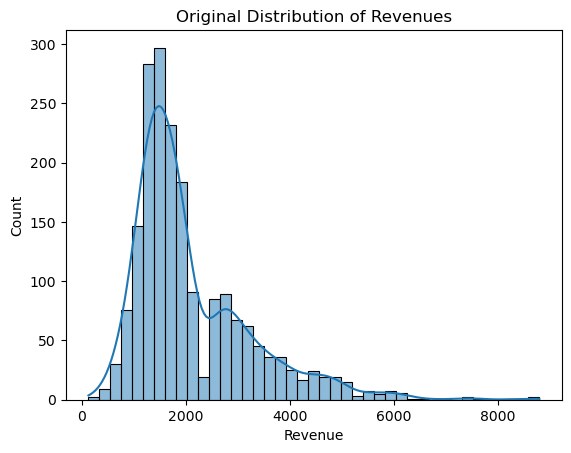

In [6]:
# developing a histogram using HISTPLOT function from seaborn
sns.histplot(data  = chef,
         x     = 'REVENUE',
        kde    = True) #bell curve/ normal distribution


# title and axis labels
plt.title(label   = "Original Distribution of Revenues")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count") 


# displaying the histogram
plt.show()

**Analysis:** Based on the above histogram, it can be observed that revenues are positively skewed since it has a longer tail towards the right, which means that there are more extreme values on the high end of the distribution.
This can also be seen from the following code:

In [7]:
# checking skewness of REVENUE
chef['REVENUE'].skew().round(decimals = 2)

1.63

A skewness value of 1.63 is moderately skewed, and it suggests that there are some outliers or extreme values in the 'REVENUE' variable.

<br>

**4) Identifying data types and correlations between x and y variables:**

In [8]:
# Creating lists to group the features into Interval/Count, Continuous and Categorical data types

#REVENUE is also a continuous variable, however for the ease of analysis has not been included in the below list
continuous_data = ['REVENUE','AVG_TIME_PER_SITE_VISIT','AVG_PREP_VID_TIME',
                   'LARGEST_ORDER_SIZE']

count_data = ['AVG_MEAN_RATING','TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
              'PRODUCT_CATEGORIES_VIEWED','CANCELLATIONS_AFTER_NOON','PC_LOGINS','MOBILE_LOGINS',
              'WEEKLY_PLAN','LATE_DELIVERIES','TOTAL_PHOTOS_VIEWED']

categorical_data = ['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME']


We will use **"REVENUE"** as our response/ dependent variable (y-variable) and the other features as our independent/ explanatory variables (x-variables). Through the course of our EDA, we will identify all the explanatory variables that will have an impact on revenue.<br>
Since a linear model assumes that all variables of the model are usually continuous, we will first understand the correlation between Revenue and the other continuous variables defined above.

In [9]:
# developing a correlation matrix based on continuous features
chef_corr = chef[continuous_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)


REVENUE                    1.00
AVG_TIME_PER_SITE_VISIT    0.64
LARGEST_ORDER_SIZE         0.44
AVG_PREP_VID_TIME          0.14
Name: REVENUE, dtype: float64

**Analysis:** The above correlation matrix shows that "AVG_TIME_PER_SITE_VISIT" has relatively the highest positive correlation with revenue. This suggests that as the average time per site visit increases, so does the revenue generated.
The correlation coefficient between 'REVENUE' and 'LARGEST_ORDER_SIZE' is 0.44, which indicates a weaker positive correlation. This suggests that there is a positive relationship between the largest order size and the revenue generated, but the relationship is not as strong as the one between 'REVENUE' and 'AVG_TIME_PER_SITE_VISIT'. <br>
To analyze further, we will create a scatter plots between Revenue and "AVG_TIME_PER_SITE_VISIT".

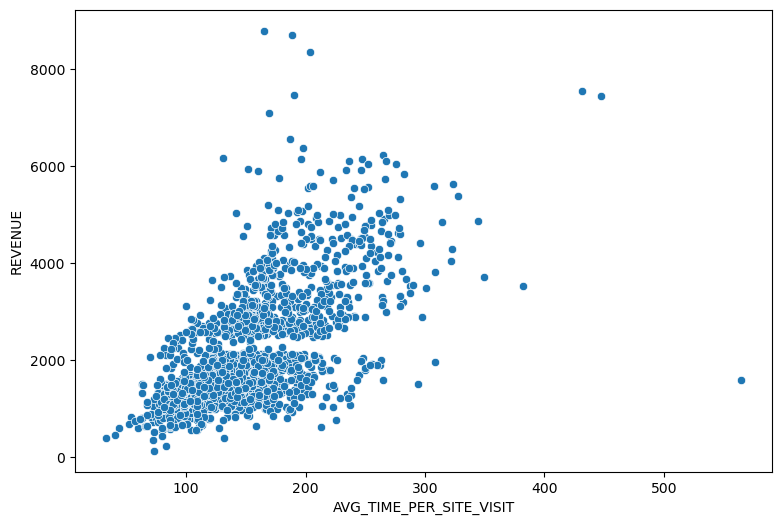

In [10]:
# Scatter plot between Revenue and AVG_TIME_PER_SITE_VISIT
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# creating the scatterplot
sns.scatterplot(x    = 'AVG_TIME_PER_SITE_VISIT',
                y    = 'REVENUE',
                data = chef
                )

# showing the results
plt.show()

<br>

**5) Building a Base Model (OLS Regression):**

We will build a basic linear model using the OLS function from statsmodels to find the best fit for x-variables that have an impact on our y- variable. <br>
We will consider data that was classified as continuous and count for this purpose (Refer Assumption-3).

In [11]:
# Checking correlation between all continuous and interval data with REVENUE

int_cont_data = ['REVENUE','AVG_TIME_PER_SITE_VISIT','AVG_PREP_VID_TIME',
                   'LARGEST_ORDER_SIZE', 'AVG_MEAN_RATING','TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
              'PRODUCT_CATEGORIES_VIEWED','CANCELLATIONS_AFTER_NOON','PC_LOGINS','MOBILE_LOGINS',
              'WEEKLY_PLAN','LATE_DELIVERIES','TOTAL_PHOTOS_VIEWED']

# developing a correlation matrix based on continuous features
chef_corr1 = chef[int_cont_data].corr(method = 'pearson')


# filtering the results to only show correlations with REVENUE
#chef_corr1.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)
chef_corr1.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                        1.00
AVG_TIME_PER_SITE_VISIT        0.64
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.46
LARGEST_ORDER_SIZE             0.44
CONTACTS_W_CUSTOMER_SERVICE    0.17
AVG_PREP_VID_TIME              0.14
UNIQUE_MEALS_PURCH             0.10
MOBILE_LOGINS                  0.07
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
WEEKLY_PLAN                    0.01
CANCELLATIONS_AFTER_NOON       0.00
LATE_DELIVERIES               -0.02
AVG_MEAN_RATING               -0.55
Name: REVENUE, dtype: float64

**Analysis:** Looking at the above matrix, we can see that the variable with the strongest positive correlation with REVENUE is AVG_TIME_PER_SITE_VISIT, with a coefficient of 0.64. Other variables with relatively strong positive correlations with REVENUE include TOTAL_MEALS_ORDERED (0.60), TOTAL_PHOTOS_VIEWED (0.46), and LARGEST_ORDER_SIZE (0.44).<br>
On the other hand, the variable with the strongest negative correlation with REVENUE is AVG_MEAN_RATING, with a coefficient of -0.55. This suggests that lower average ratings are associated with lower revenue.<br>

In [12]:
# importing statsmodel for ols regression
import statsmodels.formula.api as smf 

We will create the best fit R-squared based on the best combination of existing features that optimize both R-squared and adjusted R-squared:

In [13]:
# Step 1: Instantiating a linear model 
lm_best = smf.ols(formula = """REVENUE ~ AVG_TIME_PER_SITE_VISIT + 
                                         TOTAL_MEALS_ORDERED +
                                         AVG_MEAN_RATING +
                                         LARGEST_ORDER_SIZE+
                                         CONTACTS_W_CUSTOMER_SERVICE
                                    
                                         
                            """, # x-variable ~ y-variable
                  data = chef)


# Step 2: fitting the data into the model 
results = lm_best.fit() # creates the best fit line


# Step 3: analyzing the summary output 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     594.7
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:42:15   Log-Likelihood:                -15551.
No. Observations:                1946   AIC:                         3.111e+04
Df Residuals:                    1940   BIC:                         3.115e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

**Analysis:** As we can see from the above results of OLS regression, the combination of the features AVG_TIME_PER_SITE_VISIT, TOTAL_MEALS_ORDERED, AVG_MEAN_RATING, LARGEST_ORDER_SIZE and CONTACTS_W_CUSTOMER_SERVICE seem to be a good fit for the regression model as a starting point. This can be inferred from the values of R-squared and adj. R-squared, which have a value of 0.605 and 0.604 respectively. There is very minimal difference between both these values. <br>
Additionally, the overall model seems to be statistically significant, as indicated by the F-statistic and the associated p-value.

<br>

## Part II : Transformations and Feature Engineering 

**1) Identifying and imputing missing values for features:**

In [14]:
# identifying columns with missing values
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

In [15]:
# Aggregating the number of missing values for each column in the dataset
mv = chef.isnull().sum(axis = 0) #.sum(axis = 0) # axis means rows or columns
mv

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

 As we can see from the above information, missing values exist only in the feature "FAMILY_NAME". Being a categorical variable that is not likely to have much of an impact on our response variable (Revenue), we can just create a flag for the feature and ignore it for the purpose of developing our model.

In [16]:
# Flagging the missing family name by creating a new column: m_FAMILY_NAME
chef['m_FAMILY_NAME'] = chef['FAMILY_NAME'].isnull().astype(int)

# checking the results of the above 
chef['m_FAMILY_NAME'].sum(axis = 0)

46

 While this will not be used for our model, as a good practice, a new column has been created to identify the observations that contain missing values.

<br>

**2) Logarithmic Transformation of Variables:**

In [17]:
# importing numpy for performing transformations
import numpy as np

# log transforming REVENUE and saving it to the dataset using np.log
chef['log_REVENUE'] = np.log(chef['REVENUE'])   

Let us now create a histogram to check the logarithmic distribution of Revenue as below:

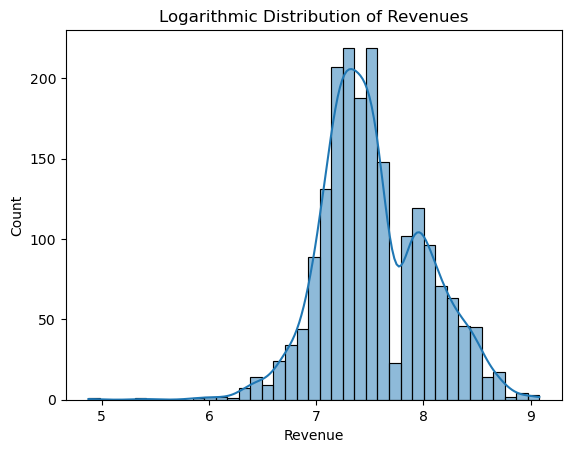

In [18]:
# developing a histogram using HISTPLOT
sns.histplot(data   = chef,
          x      = 'log_REVENUE',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Revenues")
plt.xlabel(xlabel = "Revenue") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [19]:
# checking the skewness of the Revenue vs Log_Revenue
chef[['REVENUE', 'log_REVENUE']].skew()

REVENUE        1.626573
log_REVENUE    0.184090
dtype: float64

**Analysis:** As we can see from the above code, the skewness of revenue has drastically improved and can result in being a better fit for our base model. <br>
Hence, going forward, we will use log_REVENUE as our response variable instead of REVENUE.

In [20]:
# Re-evaluating our base model using log_REVENUE instead of REVENUE

# Step 1: Instantiating a linear model 
lm_best = smf.ols(formula = """log_REVENUE ~ AVG_TIME_PER_SITE_VISIT + 
                                         TOTAL_MEALS_ORDERED +
                                         AVG_MEAN_RATING +
                                         LARGEST_ORDER_SIZE+
                                         CONTACTS_W_CUSTOMER_SERVICE
                                    
                                         
                            """, # x-variable ~ y-variable
                  data = chef)


# Step 2: fitting the data into the model 
results = lm_best.fit() # creates the best fit line


# Step 3: analyzing the summary output 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     654.1
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:42:15   Log-Likelihood:                -402.03
No. Observations:                1946   AIC:                             816.1
Df Residuals:                    1940   BIC:                             849.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

**Analysis:** The value of R-squared and adj. R-squared have improved in comparison to our base model. <br> <br>
We will now try to create similar transformations for our continuous variables and then fit it into the base model to check if there is an improvement in the explainability of the dependent variable.

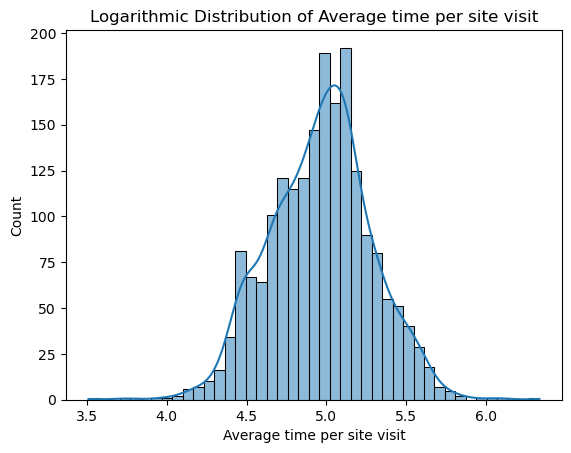

In [21]:
# log transforming AVG_TIME_PER_SITE_VISIT and saving it to the dataset using np.log
chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log(chef['AVG_TIME_PER_SITE_VISIT'])   

# developing a histogram using HISTPLOT
sns.histplot(data   = chef,
          x      = 'log_AVG_TIME_PER_SITE_VISIT',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Average time per site visit")
plt.xlabel(xlabel = "Average time per site visit") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

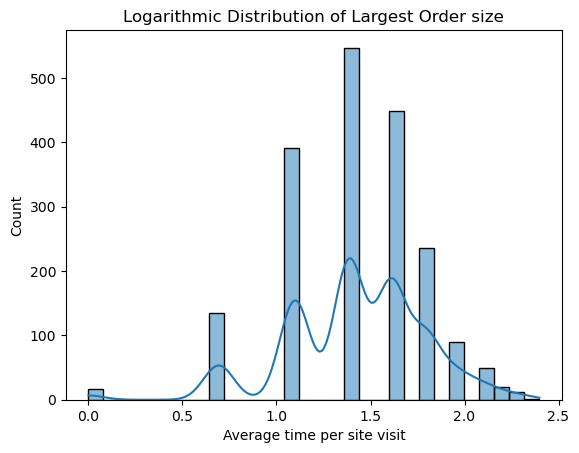

In [22]:
# log transforming LARGEST_ORDER_SIZE and saving it to the dataset using np.log
chef['log_LARGEST_ORDER_SIZE'] = np.log(chef['LARGEST_ORDER_SIZE'])   

# developing a histogram using HISTPLOT
sns.histplot(data   = chef,
          x      = 'log_LARGEST_ORDER_SIZE',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Largest Order size")
plt.xlabel(xlabel = "Average time per site visit") # avoiding using dataset labels
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

In [23]:
# checking the skewness of the AVG_TIME_PER_SITE_VISIT vs Log_AVG_TIME_PER_SITE_VISIT
chef[['AVG_TIME_PER_SITE_VISIT', 'log_AVG_TIME_PER_SITE_VISIT']].skew()

AVG_TIME_PER_SITE_VISIT        1.200283
log_AVG_TIME_PER_SITE_VISIT   -0.063739
dtype: float64

In [24]:
# checking the skewness of the LARGEST_ORDER_SIZE vs log_LARGEST_ORDER_SIZE
chef[['LARGEST_ORDER_SIZE', 'log_LARGEST_ORDER_SIZE']].skew()

LARGEST_ORDER_SIZE        0.703995
log_LARGEST_ORDER_SIZE   -0.597503
dtype: float64

As can be seen from the skewness results above, a significant change can only be seen for "AVG_TIME_PER_SITE_VISIT". Hence, we will use the log form of the variable to test our model. 

In [25]:
# Re-evaluating our base model using logarithmic transformation

# Step 1: Instantiating a linear model 
lm_best = smf.ols(formula = """log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT + 
                                         TOTAL_MEALS_ORDERED +
                                         AVG_MEAN_RATING +
                                         LARGEST_ORDER_SIZE+
                                         CONTACTS_W_CUSTOMER_SERVICE
                                    
                                         
                            """, # x-variable ~ y-variable
                  data = chef)


# Step 2: fitting the data into the model 
results = lm_best.fit() # creates the best fit line


# Step 3: analyzing the summary output 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     705.4
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:42:15   Log-Likelihood:                -355.33
No. Observations:                1946   AIC:                             722.7
Df Residuals:                    1940   BIC:                             756.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

<br>

**3) Engineering features for Categorical Data:**

Based on information received from the Marketing Team, there are different email response rates based on a customer’s email domain group. 
We can use this information to create a new feature and classify the email domains into the groups:
- Professional
- Personal
- Junk

In [26]:
# Creating lists for professional, personal and junk based on marketing team's data

prof = ["mmm.com", "amex.com", "apple.com", "boeing.com", "caterpillar.com",
    "chevron.com", "cisco.com", "cocacola.com", "disney.com", "dupont.com",
    "exxon.com", "ge.org", "goldmansacs.com", "homedepot.com", "ibm.com",
    "intel.com", "jnj.com", "jpmorgan.com", "mcdonalds.com", "merck.com",
    "microsoft.com", "nike.com", "pfizer.com", "pg.com", "travelers.com",
    "unitedtech.com", "unitedhealth.com", "verizon.com", "visa.com",
    "walmart.com"]

personal = ["gmail.com", "yahoo.com", "protonmail.com"]

junk = ["me.com", "aol.com", "hotmail.com", "live.com", "msn.com", "passport.com"]

# Splitting the domain names in our observation using '@' separator and string.split() function
# (Rochael, 2013), (w3schools, n.d.)

chef['EMAIL_DOMAIN'] = chef['EMAIL'].str.split('@', expand = True)[1]

# Creating the column 'EMAIL_GROUP' to classify into Professional, Personal or Junk
chef['EMAIL_GROUP'] = ''

# Iterating over each observation to populate the group in the above column
for index, value in chef.iterrows():

    if chef.loc[index, 'EMAIL_DOMAIN'] in prof:
        chef.loc[index, 'EMAIL_GROUP'] = 'Professional'
    elif chef.loc[index, 'EMAIL_DOMAIN'] in personal:
        chef.loc[index, 'EMAIL_GROUP'] = 'Personal'
    elif chef.loc[index, 'EMAIL_DOMAIN'] in junk:
        chef.loc[index, 'EMAIL_GROUP'] = 'Junk'
    else:
        chef.loc[index, 'EMAIL_GROUP'] = 'Unknown'

# Checking the results of the above for loop
chef.head(n=5)


,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME,log_REVENUE,log_AVG_TIME_PER_SITE_VISIT,log_LARGEST_ORDER_SIZE,EMAIL_DOMAIN,EMAIL_GROUP
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0,8.501064,5.581991,1.791759,yahoo.com,Personal
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0,8.724207,5.509388,1.609438,visa.com,Professional
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,8.141772,5.102302,1.098612,protonmail.com,Personal
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0,8.110728,5.170484,1.791759,yahoo.com,Personal
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,8.139586,5.103518,1.098612,jnj.com,Professional


We will now perform one hot encoding for the EMAIL_GROUP feature to split it into 3 columns- Junk, Professional and Personal so that we can use them as variables for our model.

In [27]:
# One- hot encoding of the email group
one_hot_EMAIL = pd.get_dummies(chef['EMAIL_GROUP'])

# dropping categorical variables after they've been encoded
chef = chef.drop('EMAIL_GROUP', axis = 1)

# joining one_hot_EMAIL together
chef = chef.join([one_hot_EMAIL])

# Viewing our updated dataset
chef.head(n = 5)

,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,m_FAMILY_NAME,log_REVENUE,log_AVG_TIME_PER_SITE_VISIT,log_LARGEST_ORDER_SIZE,EMAIL_DOMAIN,Junk,Personal,Professional
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0,8.501064,5.581991,1.791759,yahoo.com,0,1,0
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0,8.724207,5.509388,1.609438,visa.com,0,0,1
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0,8.141772,5.102302,1.098612,protonmail.com,0,1,0
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0,8.110728,5.170484,1.791759,yahoo.com,0,1,0
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174,0,8.139586,5.103518,1.098612,jnj.com,0,0,1


Since the junk emails receive no response as per the marketing team, it is unlikely that they will increase the revenue. <br>
Hence, we will now include our newly engineered features - "Personal" and "Professional" in our base model to see the impact to R-squared and adj. R-squared.

In [28]:
# Re-evaluating our base model by including engineered features

# Step 1: Instantiating a linear model 
lm_best = smf.ols(formula = """log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT + 
                                         TOTAL_MEALS_ORDERED +
                                         AVG_MEAN_RATING +
                                         LARGEST_ORDER_SIZE+
                                         CONTACTS_W_CUSTOMER_SERVICE+
                                          Professional + Personal + PRODUCT_CATEGORIES_VIEWED
                                    
                                         
                            """, # x-variable ~ y-variable
                  data = chef)


# Step 2: fitting the data into the model 
results = lm_best.fit() # creates the best fit line


# Step 3: analyzing the summary output 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     442.8
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:42:15   Log-Likelihood:                -351.66
No. Observations:                1946   AIC:                             721.3
Df Residuals:                    1937   BIC:                             771.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [29]:
# developing a small correlation matrix
emails_corr = chef.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with REVENUE
emails_corr.loc['REVENUE',                   # Y-variable
               ['Personal', 'Professional', # X-variables
                'Junk']] \
                .sort_values(ascending = False)

Professional    0.010783
Personal        0.007963
Junk           -0.022813
Name: REVENUE, dtype: float64

Since the bifurcation of email types does not seem to have an impact on R-squared, we will not include it in our model.

<br>

**4) Engineering features for Count/ Interval Data:**

Since most of our data is Count data, it is likely that these variables will be significant for our model. In this section, we will engineer new features using the count data and see which ones fit best in the base model.

In [30]:
chef.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

<br>

In [31]:
# Total number of logins
chef['TOTAL_LOGINS'] = chef['PC_LOGINS'] + chef['MOBILE_LOGINS']

# Proportion of late deliveries to total orders
chef['LATE_TO_TOTAL'] = chef['LATE_DELIVERIES'] / chef['TOTAL_MEALS_ORDERED']

# Proportion of Customer service contacts to total orders
chef['CUST_SERV_TO_TOTAL'] = chef['CONTACTS_W_CUSTOMER_SERVICE'] / chef['TOTAL_MEALS_ORDERED']

# Proportion of Cancellations after noon to total orders
chef['CANCEL_TO_TOTAL'] = chef['CANCELLATIONS_AFTER_NOON'] / chef['TOTAL_MEALS_ORDERED']

# Proportion of Unique orders to total orders
chef['UNIQUE_TO_TOTAL'] = chef['UNIQUE_MEALS_PURCH'] / chef['TOTAL_MEALS_ORDERED']

# Total orders to Total logins
chef['ORDERS_TO_LOGINS'] = chef['TOTAL_MEALS_ORDERED'] / chef['TOTAL_LOGINS']
 

In [32]:
# developing a small correlation matrix
interval_corr = chef.corr()    # .round(decimals = 2)


# checking the correlations of the newly-created variables with REVENUE
interval_corr.loc['REVENUE',                   # Y-variable
               ['TOTAL_LOGINS', 'LATE_TO_TOTAL', # X-variables
                'CUST_SERV_TO_TOTAL', 'CANCEL_TO_TOTAL', 'UNIQUE_TO_TOTAL','ORDERS_TO_LOGINS' ]] \
                .sort_values(ascending = False)

ORDERS_TO_LOGINS      0.582633
TOTAL_LOGINS          0.061235
LATE_TO_TOTAL        -0.183717
CANCEL_TO_TOTAL      -0.276874
CUST_SERV_TO_TOTAL   -0.314697
UNIQUE_TO_TOTAL      -0.402982
Name: REVENUE, dtype: float64

**Analysis:** <br>
- ORDERS_TO_LOGINS has a strong positive correlation (0.58) with REVENUE, indicating that as the ratio of orders to logins increases, the revenue generated also tends to increase.
- TOTAL_LOGINS has a weak positive correlation (0.06) with REVENUE, indicating that a higher number of total logins is associated with a slightly higher revenue.
- LATE_TO_TOTAL has a weak negative correlation (-0.18) with REVENUE, indicating that as the ratio of late deliveries to total deliveries increases, the revenue generated tends to decrease slightly.
- CANCEL_TO_TOTAL has a moderate negative correlation (-0.28) with REVENUE, indicating that as the ratio of cancellations to total orders increases, the revenue generated tends to decrease.
- CUST_SERV_TO_TOTAL has a moderate negative correlation (-0.31) with REVENUE, indicating that as the ratio of contacts with customer service to total orders increases, the revenue generated tends to decrease.
- UNIQUE_TO_TOTAL has a strong negative correlation (-0.40) with REVENUE, indicating that as the ratio of unique meals to total meals ordered increases, the revenue generated tends to decrease.

Let us now re-evaluate our OLS model by including the engineered features with strong correlations.

In [33]:
# Re-evaluating our base model by including engineered features for interval data

# Step 1: Instantiating a linear model 
lm_best = smf.ols(formula = """log_REVENUE ~ log_AVG_TIME_PER_SITE_VISIT + 
                                         TOTAL_MEALS_ORDERED +
                                         AVG_MEAN_RATING +
                                         LARGEST_ORDER_SIZE+
                                         CONTACTS_W_CUSTOMER_SERVICE+
                                         PRODUCT_CATEGORIES_VIEWED+
                                         ORDERS_TO_LOGINS+
                                         UNIQUE_TO_TOTAL +
                                         CUST_SERV_TO_TOTAL +
                                         CANCEL_TO_TOTAL +LATE_DELIVERIES + AVG_PREP_VID_TIME
                                         
                                          
                                    
                                         
                            """, # x-variable ~ y-variable
                  data = chef)


# Step 2: fitting the data into the model 
results = lm_best.fit() # creates the best fit line


# Step 3: analyzing the summary output 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            log_REVENUE   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     332.5
Date:                Sun, 19 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:42:15   Log-Likelihood:                -273.91
No. Observations:                1946   AIC:                             573.8
Df Residuals:                    1933   BIC:                             646.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

As we can see from the output, the R-squared and adjusted R-squared have increased in comparison to the earlier tested base model.

<br>

## Part III: Developing and Evaluating a Predictive Model

**1) Importing libraries and preparing the model for scikit-learn:** 

In [34]:
# Importing Scikit-Learn and required modules to build the predective model

from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model # linear modeling in scikit-learn

In [35]:
# Creating a list of our x-variables 

x_var_log_y = ['log_AVG_TIME_PER_SITE_VISIT', 'TOTAL_MEALS_ORDERED', 'AVG_MEAN_RATING', 'LARGEST_ORDER_SIZE',
                'CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED', 'ORDERS_TO_LOGINS', 'UNIQUE_TO_TOTAL' ,
                'CUST_SERV_TO_TOTAL' , 'CANCEL_TO_TOTAL']

In [36]:
# preparing for scikit-learn

# preparing x-variables from the OLS model
x_data = chef[x_var_log_y]


# preparing response variable
y_data = chef['log_REVENUE']


###############################################
## setting up train-test split ##
###############################################
x_train, x_test, y_train, y_test = train_test_split(
            x_data, 
            y_data, 
            test_size    = 0.25,
            random_state = 219)

**2) Building Regression models and evaluating them based on Train-Test Gap:**

- Linear Regression

In [37]:
# Setting a model name
model_name = "Linear Regression (log-y)"


# INSTANTIATING a model object
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
output_model =  f"""\n
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(output_model)



Model Name:     Linear Regression (log-y)
Train_Score:    0.6707
Test_Score:     0.6751
Train-Test Gap: 0.0044



In [38]:
#EXTRACTING COEFFECIENTS

# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', 4.23)
('log_AVG_TIME_PER_SITE_VISIT', 0.76)
('TOTAL_MEALS_ORDERED', 0.0)
('AVG_MEAN_RATING', -0.15)
('LARGEST_ORDER_SIZE', -0.05)
('CONTACTS_W_CUSTOMER_SERVICE', 0.03)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('ORDERS_TO_LOGINS', -0.0)
('UNIQUE_TO_TOTAL', -0.31)
('CUST_SERV_TO_TOTAL', -0.15)
('CANCEL_TO_TOTAL', -0.35)


**Conclusion:** Linear Regression is performing relatively well, with a training score of 0.6707 and a testing score of 0.6751. The train-test gap of 0.0044 is also quite small, indicating that the model is not overfitting the training data. 

- Lasso Regression

In [39]:
# Setting a model name
model_name = "Lasso Regression Model (log-y)"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Lasso()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
output_model =  f"""\n
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(output_model)



Model Name:     Lasso Regression Model (log-y)
Train_Score:    0.38
Test_Score:     0.3328
Train-Test Gap: 0.0472



In [40]:
#EXTRACTING COEFFECIENTS

# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', 7.14)
('log_AVG_TIME_PER_SITE_VISIT', 0.0)
('TOTAL_MEALS_ORDERED', 0.01)
('AVG_MEAN_RATING', -0.0)
('LARGEST_ORDER_SIZE', 0.0)
('CONTACTS_W_CUSTOMER_SERVICE', 0.0)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('ORDERS_TO_LOGINS', 0.0)
('UNIQUE_TO_TOTAL', -0.0)
('CUST_SERV_TO_TOTAL', -0.0)
('CANCEL_TO_TOTAL', -0.0)


**Conclusion:** The Lasso regression model with default hyperparameters is not performing as well as the OLS regression model. The training score and testing score are both lower, and the train-test gap is larger.

- Ridge Regression

In [41]:
# Setting a model name
model_name = "Ridge Regression Model (log-y)"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Ridge()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
output_model =  f"""\n
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(output_model)



Model Name:     Ridge Regression Model (log-y)
Train_Score:    0.6706
Test_Score:     0.6756
Train-Test Gap: 0.005



In [42]:
#EXTRACTING COEFFECIENTS

# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', 4.3)
('log_AVG_TIME_PER_SITE_VISIT', 0.75)
('TOTAL_MEALS_ORDERED', 0.0)
('AVG_MEAN_RATING', -0.15)
('LARGEST_ORDER_SIZE', -0.05)
('CONTACTS_W_CUSTOMER_SERVICE', 0.03)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('ORDERS_TO_LOGINS', -0.0)
('UNIQUE_TO_TOTAL', -0.32)
('CUST_SERV_TO_TOTAL', -0.15)
('CANCEL_TO_TOTAL', -0.29)


**Conclusion:** The testing score of the Ridge Regression model indicates that explains 67.56% of the variance in the testing data. The train-test gap is 0.005, which is relatively small and indicates that the model generalizes well to new data.
While Ridge Regression performs exceedingly well in terms of minimal train-test gap, the R-square values are moderately low.

- ARD Regression

In [43]:
# Setting a model name
model_name = "ARD Regression Model (log-y)"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.ARDRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
output_model =  f"""\n
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(output_model)



Model Name:     ARD Regression Model (log-y)
Train_Score:    0.6347
Test_Score:     0.6398
Train-Test Gap: 0.0051



In [44]:
#EXTRACTING COEFFECIENTS

# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)
    

# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', 4.17)
('log_AVG_TIME_PER_SITE_VISIT', 0.85)
('TOTAL_MEALS_ORDERED', 0.0)
('AVG_MEAN_RATING', -0.19)
('LARGEST_ORDER_SIZE', -0.05)
('CONTACTS_W_CUSTOMER_SERVICE', 0.04)
('PRODUCT_CATEGORIES_VIEWED', 0.0)
('ORDERS_TO_LOGINS', 0.0)
('UNIQUE_TO_TOTAL', -0.37)
('CUST_SERV_TO_TOTAL', -0.42)
('CANCEL_TO_TOTAL', -0.46)


**Conclusion:** While the small train-test gap suggests that the ARD model is not overfitting or underfitting the data, the R-squared values are relatively low.

**3) Building CART and Ensemble Models and evaluating Train-Test Gap:**

- Preparing data for modeling:

In [45]:
# Importing required libraries and modules

# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm

In [46]:
# Defining list of x-variables for train-test split
x_var_log_y_full = ['log_AVG_TIME_PER_SITE_VISIT', 
                 'TOTAL_MEALS_ORDERED', 
                 'AVG_MEAN_RATING', 
                 'LARGEST_ORDER_SIZE',
                 'CONTACTS_W_CUSTOMER_SERVICE',
                 'PRODUCT_CATEGORIES_VIEWED', 
                 'ORDERS_TO_LOGINS', 
                 'UNIQUE_TO_TOTAL' ,
                 'CUST_SERV_TO_TOTAL' , 
                 'CANCEL_TO_TOTAL',
                 'UNIQUE_MEALS_PURCH', 
                 'CANCELLATIONS_AFTER_NOON', 
                 'PC_LOGINS',
                 'MOBILE_LOGINS',
                 'WEEKLY_PLAN',
                 'LATE_DELIVERIES', 
                 'AVG_PREP_VID_TIME', 
                 'TOTAL_PHOTOS_VIEWED', 
                 'Junk', 'Personal', 'Professional',
                 'TOTAL_LOGINS', 'LATE_TO_TOTAL'
                ]

In [47]:
# preparing x-variables

x1_data = chef.loc[ : , x_var_log_y_full ] 


# preparing y-variable
y1_data = chef.loc[ : , 'log_REVENUE']    # y-variable 


In [48]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(
            x1_data,
            y1_data,
            test_size    = 0.25,
            random_state = 219)

- Unpruned Regression Tree

In [49]:
model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = DecisionTreeRegressor()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)

# dynamically printing results
output_model =  f"""\n
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(output_model)



Model Name:     Unpruned Regression Tree
Train_Score:    1.0
Test_Score:     0.5545
Train-Test Gap: 0.4455



- Pruned Regression Tree

In [50]:
model_name = 'Pruned Regression Tree'

# INSTANTIATING a model object - CHANGE THIS AS NEEDED

model = DecisionTreeRegressor(max_depth = 6, #9
                              min_samples_leaf = 26, #18
                              random_state = 219)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(2) # using R-square
model_test_score  = model.score(x_test, y_test).round(2)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)

# dynamically printing results
output_model =  f"""\n
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(output_model)



Model Name:     Pruned Regression Tree
Train_Score:    0.77
Test_Score:     0.73
Train-Test Gap: 0.04



**Conclusion:** The Pruned Regression Tree performs well in terms of Train-test gap however the testing score has scope of improvement.

- Random Forest

In [51]:
# specifying a model name
model_name = 'Unpruned Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 100, 
                              criterion        = 'squared_error', 
                              max_depth        = None, 
                              min_samples_leaf = 1,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)

# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)

# dynamically printing results
output_model =  f"""\n
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(output_model)



Model Name:     Unpruned Random Forest
Train_Score:    0.9736
Test_Score:     0.8135
Train-Test Gap: 0.1601



In [52]:
# specifying a model name
model_name = 'Pruned Random Forest'


# INSTANTIATING a random forest model with default values
model = RandomForestRegressor(n_estimators     = 200,
                              criterion        = 'squared_error',
                              max_depth        = 8,
                              min_samples_leaf = 18,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(2) # using R-square
model_test_score  = model.score(x_test, y_test).round(2)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(2)

# dynamically printing results
output_model =  f"""\n
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(output_model)



Model Name:     Pruned Random Forest
Train_Score:    0.82
Test_Score:     0.79
Train-Test Gap: 0.03



**Conclusion:** The Pruned Random Forest model performs the best out of all models tested until now, in terms of both the testing score as well as the train-test gap.

- Gradient Boosting Machines

In [53]:
# specifying a model name
model_name = 'Pruned GBM'


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss          = 'absolute_error',
                                  learning_rate = 0.15,
                                  n_estimators  = 100,
                                  criterion     = 'absolute_error',
                                  max_depth     = 3,
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(2) # using R-square
model_test_score  = model.score(x_test, y_test).round(2)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
output_model =  f"""\n
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(output_model)

/Users/rheakapoor/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(




Model Name:     Pruned GBM
Train_Score:    0.85
Test_Score:     0.82
Train-Test Gap: 0.03



**Conclusion:** By tuning the hyperparameters, the GBM model outperforms the Pruned Random Forest Model with an R-squared of 0.82 and a train-test gap of 0.03.

<br>

## Part IV: Final Model

Based on all the models built in Part III, **Pruned Gradient Boosting Machine** appears to have the highest test score and least train-test gap. Hence, we will consider the same as our final model. <br>
The model was tuned by setting the default loss and criterion parameters to "absolute_error" and learning rate to 0.15.<br>
Below is a snapshot of the steps to create the entire model:

In [54]:
#----------------------------------------------------------------------------#
# STEP1: Defining a list of full set of X-variables:
x_var_log_y_full = ['log_AVG_TIME_PER_SITE_VISIT', 
                 'TOTAL_MEALS_ORDERED', 
                 'AVG_MEAN_RATING', 
                 'LARGEST_ORDER_SIZE',
                 'CONTACTS_W_CUSTOMER_SERVICE',
                 'PRODUCT_CATEGORIES_VIEWED', 
                 'ORDERS_TO_LOGINS', 
                 'UNIQUE_TO_TOTAL' ,
                 'CUST_SERV_TO_TOTAL' , 
                 'CANCEL_TO_TOTAL',
                 'UNIQUE_MEALS_PURCH', 
                 'CANCELLATIONS_AFTER_NOON', 
                 'PC_LOGINS',
                 'MOBILE_LOGINS',
                 'WEEKLY_PLAN',
                 'LATE_DELIVERIES', 
                 'AVG_PREP_VID_TIME', 
                 'TOTAL_PHOTOS_VIEWED', 
                 'Junk', 'Personal', 'Professional',
                 'TOTAL_LOGINS', 'LATE_TO_TOTAL'
                ]
#----------------------------------------------------------------------------#
#STEP2: Train-test Split:

# preparing x-variables

x1_data = chef.loc[ : , x_var_log_y_full ] 


# preparing y-variable
y1_data = chef.loc[ : , 'log_REVENUE']    # y-variable 

# train-test split
x_train, x_test, y_train, y_test = train_test_split(
            x1_data,
            y1_data,
            test_size    = 0.25,
            random_state = 219)



#----------------------------------------------------------------------------#
#STEP3: UNPRUNED GBM

# specifying a model name
model_name = 'Unpruned GBM'


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss          = 'squared_error',
                                  learning_rate = 0.1,
                                  n_estimators  = 100,
                                  criterion     = 'friedman_mse',
                                  max_depth     = 3,
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(2) # using R-square
model_test_score  = model.score(x_test, y_test).round(2)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# dynamically printing results
output_model =  f"""\n
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}
"""
print(output_model)





Model Name:     Unpruned GBM
Train_Score:    0.9
Test_Score:     0.8
Train-Test Gap: 0.1



In [55]:
#----------------------------------------------------------------------------#
#STEP4: PRUNED GRADIENT BOOSTING MACHINE 
# specifying a model name
model_name = '\033[1;32mFINAL MODEL - Pruned GRADIENT BOOSTING MACHINE\033[0m'


# INSTANTIATING the model object
model = GradientBoostingRegressor(loss          = 'absolute_error',
                                  learning_rate = 0.15,
                                  n_estimators  = 100,
                                  criterion     = 'absolute_error',
                                  max_depth     = 3,
                                  warm_start    = False,
                                  random_state  = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(2) # using R-square
model_test_score  = model.score(x_test, y_test).round(2)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)



# dynamically printing results
final_model =  f"""\n
\033[1mModel Name:\033[0m      {model_name}
\033[1mTrain_Score:\033[0m     {model_train_score}
\033[1mTest_Score: \033[0m     {model_test_score}
\033[1mTrain-Test Gap:\033[0m  {model_gap}
"""
print(final_model)

/Users/rheakapoor/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1854: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='absolute_error' instead.
  warnings.warn(




Model Name:      FINAL MODEL - Pruned GRADIENT BOOSTING MACHINE
Train_Score:     0.85
Test_Score:      0.82
Train-Test Gap:  0.03

